Reading file and understanding data

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [110]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [111]:
bike.shape

(730, 16)

In [112]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [113]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#cleaning data : dropping unnecessary columns

In [114]:
#dropping instant as it was used for indexing only
bike.drop(['instant'],axis=1,inplace=True)
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<AxesSubplot:>

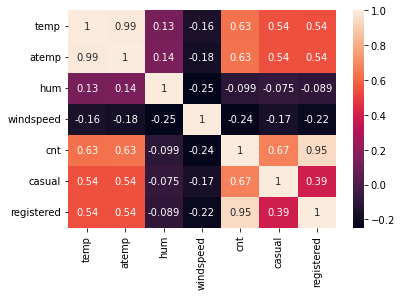

In [115]:
#checking correlation of numeric columns
corrmatrix=bike[["temp","atemp","hum","windspeed","cnt",'casual','registered']].corr()
sns.heatmap(corrmatrix, annot=True)

In [116]:
#dropping casual and registered as their total is in cnt only so of no use and dteday is also of no use as days months season and year are already there
bike.drop(['casual','registered','dteday'],axis=1,inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [117]:
#dropping atemp as temp and atemp has very high corelation
bike.drop(["atemp"],axis=1,inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [118]:
#Assigning string values to different categorical columns like season mnth weekday, weathersit etc instead of numeric values and setting type as category.

#1=spring
bike.loc[(bike['season']== 1), 'season'] = 'spring'

#2=summer
bike.loc[(bike['season']== 2), 'season'] = 'summer'

#3=fall
bike.loc[(bike['season']== 3), 'season'] = 'fall'

#4=winter
bike.loc[(bike['season']== 4), 'season'] = 'winter'

In [119]:
bike['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [120]:
bike['yr'].astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [121]:
def object_map(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

bike[['mnth']] = bike[['mnth']].apply(object_map)

In [122]:
bike[['mnth']].astype('category').value_counts()

mnth
Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sep     60
Feb     56
dtype: int64

In [123]:
def str_map(x):
    return x.map({1:'Wed', 2:'Thurs', 3:'Fri', 4:'Sat', 5:'Sun', 6:'Mon', 7:'Tues'})

bike[['weekday']] = bike[['weekday']].apply(str_map)

In [124]:
bike[['weekday']].astype('category').value_counts()

weekday
Thurs      105
Wed        105
Fri        104
Mon        104
Sat        104
Sun        104
dtype: int64

In [125]:
bike.workingday.astype('category').value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [126]:
#Replacing long weathersit names into string values for better readability and understanding

#1: Clear for-Clear, Few clouds, Partly cloudy, Partly cloudy
bike.loc[(bike['weathersit']== 1), 'weathersit'] = 'Clear'

#2:cloudsy for- Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
bike.loc[(bike['weathersit']== 2), 'weathersit'] = 'Cloudy'    

#3: Rain for-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
bike.loc[(bike['weathersit']== 3), 'weathersit'] = 'Rain'

#4: thunderstrom for- Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
bike.loc[(bike['weathersit']== 4), 'weathersit'] = 'Thunderstrom'

In [127]:
bike['weathersit'].astype('category').value_counts()

Clear     463
Cloudy    246
Rain       21
Name: weathersit, dtype: int64

#checking for outliers and replacing them with appropriate values

<AxesSubplot:>

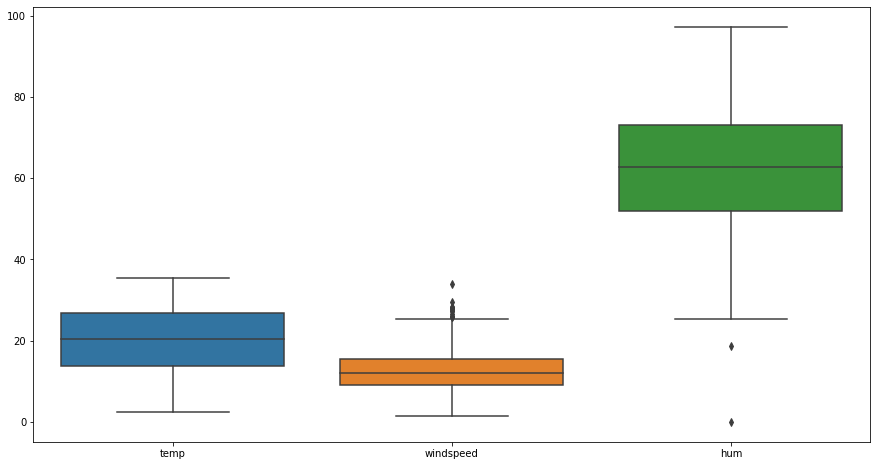

In [128]:
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=bike[['temp','windspeed','hum']])

<AxesSubplot:>

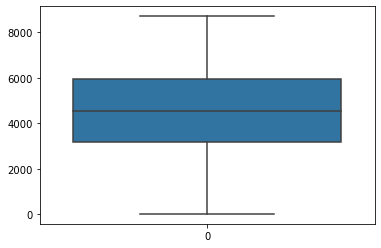

In [129]:
sns.boxplot(data=bike['cnt'])

In [130]:
iqrw = bike['windspeed'].quantile(0.75)-bike['windspeed'].quantile(0.25)
ubw = bike['windspeed'].quantile(0.75)+1.5*iqrw
iqrh = bike['hum'].quantile(0.75)-bike['hum'].quantile(0.25)
lbh = bike['hum'].quantile(0.25)-1.5*iqrw

In [131]:
meanw = float(bike['windspeed'].mean())
bike['windspeed'] = np.where(bike["windspeed"] > ubw, meanw, bike['windspeed'])
meanh = float(bike['hum'].mean())
bike['hum'] = np.where(bike["hum"] < lbh, meanh, bike['hum'])

In [132]:
#performing univariate analysis

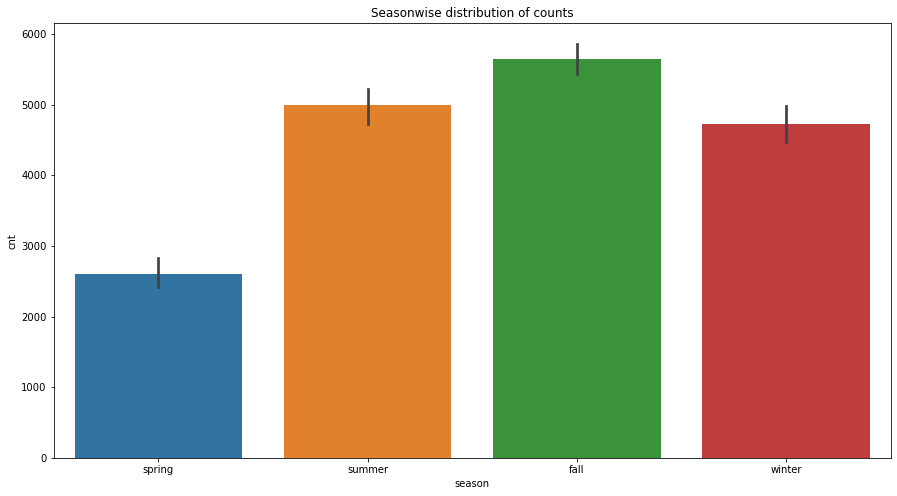

In [133]:
fig,ax=plt.subplots(figsize=(15,8))
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='season',y='cnt',data=bike)
ax.set_title('Seasonwise distribution of counts')
plt.show()

# maximum bikes are hired in summer and fall

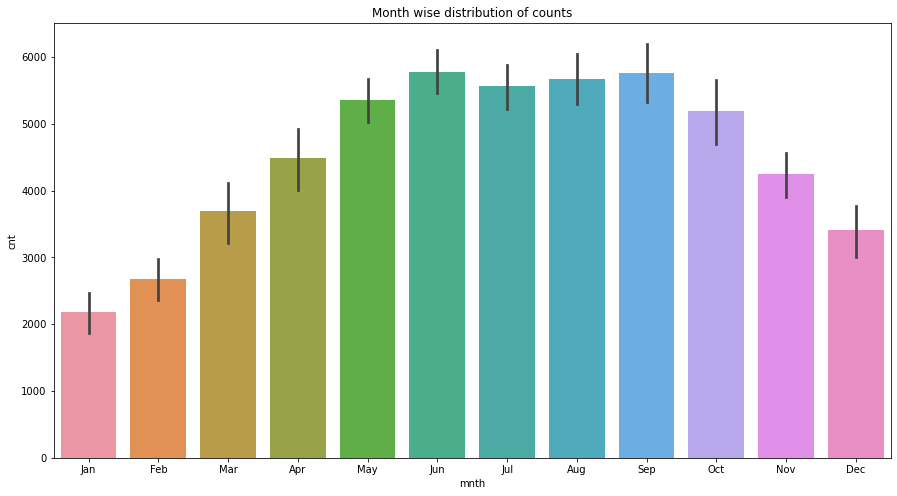

In [134]:
fig,ax=plt.subplots(figsize=(15,8))
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='mnth',y='cnt',data=bike)
ax.set_title('Month wise distribution of counts')
plt.show()

In [135]:
# maximum bikes are hired from May to October

C:\Users\aeagu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hum', ylabel='Density'>

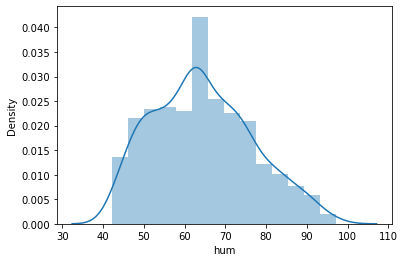

In [136]:
sns.distplot(bike['hum'])

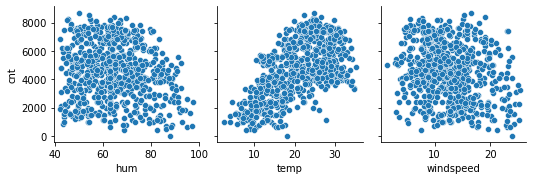

In [137]:
sns.pairplot(x_vars=['hum','temp','windspeed'],y_vars='cnt', data=bike)

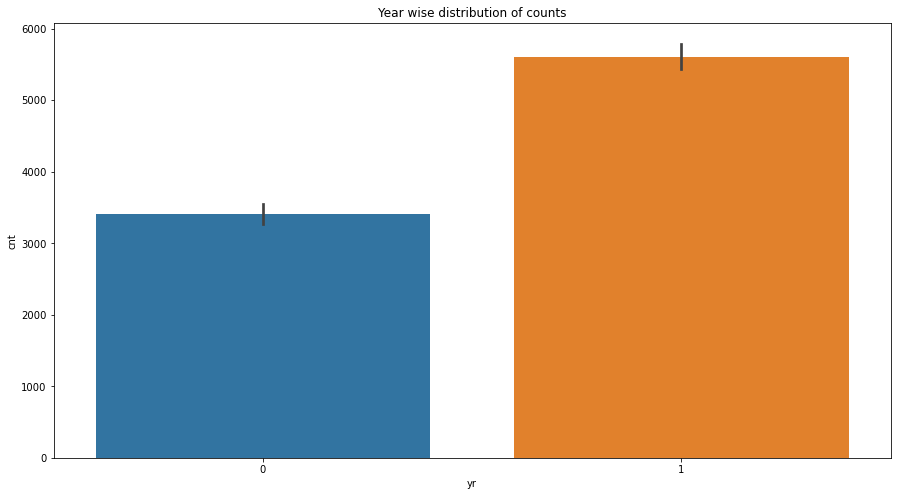

In [138]:
fig,ax=plt.subplots(figsize=(15,8))
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='yr',y='cnt',data=bike)
ax.set_title('Year wise distribution of counts')
plt.show()

In [139]:
# we can see in year 1 i.e. 2019 cnt almost doubled that can be because of business getting popularity

In [140]:
# adding dummy variable to the cateorical variables

In [141]:
bike_cat = bike.select_dtypes(include=['object'])

In [142]:
bike_dummies = pd.get_dummies(bike_cat, drop_first=True)
bike_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Wed,weathersit_Cloudy,weathersit_Rain
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [143]:
bike = bike.drop(list(bike_cat.columns), axis=1)

In [144]:
bike = pd.concat([bike,bike_dummies],axis=1)
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Wed,weathersit_Cloudy,weathersit_Rain
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [145]:
# splitting the data into training and testing data with 70:30 ration
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(bike, train_size=0.7, test_size=0.3, random_state=100)

In [146]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Wed,weathersit_Cloudy,weathersit_Rain
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,0,1,0,0,0,0,0,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,6664,0,1,0,...,0,0,0,0,0,0,1,0,1,0
578,1,0,1,30.852500,65.9583,8.666718,7261,0,0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,1917,1,0,0,...,0,0,0,0,0,1,0,0,0,0
350,0,0,1,10.591653,56.0833,16.292189,2739,0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [147]:
# selecting columns with numerical data and scaling the data using standard scaling
numer_var = list(bike.select_dtypes(include = ['int64', 'float64']).columns)
numer_var

['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt']

In [148]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_train[numer_var] = scaler.fit_transform(df_train[numer_var])

C:\Users\aeagu\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [149]:
# seperating the target variable
y_train = df_train.pop('cnt')
x_train = df_train

In [150]:
#traing that data using rfe with 15 feature selection
from sklearn.feature_selection import RFE
lm = LinearRegression()
rfe = RFE(lm, 15)
rfe.fit(x_train, y_train)

C:\Users\aeagu\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


RFE(estimator=LinearRegression(), n_features_to_select=15)

In [151]:
rfe.support_

array([ True, False, False,  True, False, False,  True, False,  True,
       False,  True,  True,  True,  True, False, False,  True,  True,
       False,  True, False, False, False,  True,  True,  True,  True])

In [152]:
col = x_train.columns[rfe.support_]

In [153]:
x_train_rfe = x_train[col]

In [154]:
x_train_rfe.head()

,yr,temp,season_spring,season_winter,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_May,mnth_Nov,mnth_Sep,weekday_Thurs,weekday_Wed,weathersit_Cloudy,weathersit_Rain
653,0.984435,-0.121335,0,1,0,0,0,0,0,0,0,0,0,0,0
576,0.984435,1.231731,0,0,0,0,0,1,0,0,0,0,0,0,0
426,0.984435,-0.420478,1,0,0,0,0,0,0,0,0,0,0,1,0
728,0.984435,-1.294913,1,0,1,0,0,0,0,0,0,0,1,0,0
482,0.984435,-0.627580,0,0,0,0,0,0,0,0,0,0,0,1,0


In [155]:
import statsmodels.api as sm
x_train_rfe = sm.add_constant(x_train_rfe)

lm1 = sm.OLS(y_train, x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     159.1
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          4.64e-178
Time:                        21:21:37   Log-Likelihood:                -274.07
No. Observations:                 510   AIC:                             580.1
Df Residuals:                     494   BIC:                             647.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2725      0.04

C:\Users\aeagu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [156]:
#training the model using 17 features
from sklearn.feature_selection import RFE
lm = LinearRegression()
rfe = RFE(lm, 17)
rfe.fit(x_train, y_train)

C:\Users\aeagu\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=17 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


RFE(estimator=LinearRegression(), n_features_to_select=17)

In [157]:
col = x_train.columns[rfe.support_]
x_train_rfe = x_train[col]
x_train_rfe.head()

,yr,temp,hum,windspeed,season_spring,season_winter,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_May,mnth_Nov,mnth_Sep,weekday_Thurs,weekday_Wed,weathersit_Cloudy,weathersit_Rain
653,0.984435,-0.121335,-0.717305,-0.061885,0,1,0,0,0,0,0,0,0,0,0,0,0
576,0.984435,1.231731,0.471412,-0.297421,0,0,0,0,0,1,0,0,0,0,0,0,0
426,0.984435,-0.420478,-0.204458,-0.358367,1,0,0,0,0,0,0,0,0,0,0,1,0
728,0.984435,-1.294913,-1.328642,2.301511,1,0,1,0,0,0,0,0,0,0,1,0,0
482,0.984435,-0.627580,-1.277697,-0.794549,0,0,0,0,0,0,0,0,0,0,0,1,0


In [158]:
import statsmodels.api as sm
x_train_rfe = sm.add_constant(x_train_rfe)

lm2 = sm.OLS(y_train, x_train_rfe).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     154.3
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.34e-184
Time:                        21:21:37   Log-Likelihood:                -253.08
No. Observations:                 510   AIC:                             542.2
Df Residuals:                     492   BIC:                             618.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2205      0.04

C:\Users\aeagu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = x_train_rfe.columns[1:]
vif['VIF'] = [variance_inflation_factor(x_train_rfe.drop(columns = 'const').values, i) for i in range(len(x_train_rfe.columns[1:]))]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
4,season_spring,3.58
1,temp,2.69
5,season_winter,2.53
8,mnth_Jan,2.43
7,mnth_Feb,1.95
15,weathersit_Cloudy,1.85
11,mnth_Nov,1.84
6,mnth_Dec,1.66
2,hum,1.65
9,mnth_Jul,1.46


In [160]:
#dropping season_spring due to high vif
x_train_rfe.drop(columns = 'season_spring', inplace = True)
import statsmodels.api as sm
x_train_rfe = sm.add_constant(x_train_rfe)

lm3 = sm.OLS(y_train, x_train_rfe).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     156.6
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.87e-181
Time:                        21:21:37   Log-Likelihood:                -263.29
No. Observations:                 510   AIC:                             560.6
Df Residuals:                     493   BIC:                             632.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1195      0.04

C:\Users\aeagu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [161]:
#dropping weekday_Wed for p value =0.46
x_train_rfe.drop(columns = 'weekday_Wed', inplace = True)
import statsmodels.api as sm
x_train_rfe = sm.add_constant(x_train_rfe)

lm4 = sm.OLS(y_train, x_train_rfe).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     165.8
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.03e-181
Time:                        21:21:37   Log-Likelihood:                -265.34
No. Observations:                 510   AIC:                             562.7
Df Residuals:                     494   BIC:                             630.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0973      0.03

C:\Users\aeagu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [162]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = x_train_rfe.columns[1:]
vif['VIF'] = [variance_inflation_factor(x_train_rfe.drop(columns = 'const').values, i) for i in range(len(x_train_rfe.columns[1:]))]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
1,temp,2.56
4,season_winter,2.35
10,mnth_Nov,1.83
13,weathersit_Cloudy,1.76
2,hum,1.61
7,mnth_Jan,1.61
5,mnth_Dec,1.54
8,mnth_Jul,1.45
6,mnth_Feb,1.30
14,weathersit_Rain,1.29


In [163]:
#dropping weekday_Thurs column also due to high p value
x_train_rfe.drop(columns = 'weekday_Thurs', inplace = True)
import statsmodels.api as sm
x_train_rfe = sm.add_constant(x_train_rfe)

lm5 = sm.OLS(y_train, x_train_rfe).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     176.2
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          6.12e-182
Time:                        21:21:37   Log-Likelihood:                -267.50
No. Observations:                 510   AIC:                             565.0
Df Residuals:                     495   BIC:                             628.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0808      0.03

C:\Users\aeagu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [164]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_train_rfe.drop(columns = 'const').values
vif = pd.DataFrame()
vif['features'] = x_train_rfe.columns[1:]
vif['VIF'] = [variance_inflation_factor(x_train_rfe.drop(columns = 'const').values, i) for i in range(len(x_train_rfe.columns[1:]))]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
1,temp,2.55
4,season_winter,2.30
10,mnth_Nov,1.83
12,weathersit_Cloudy,1.75
2,hum,1.61
7,mnth_Jan,1.60
5,mnth_Dec,1.54
8,mnth_Jul,1.43
13,weathersit_Rain,1.29
6,mnth_Feb,1.28


In [165]:
#scaling test data numerical columns
df_test[numer_var] = scaler.transform(df_test[numer_var])

C:\Users\aeagu\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [166]:
#seperating the target variable
y_test = df_test.pop('cnt')
x_test = df_test

In [167]:
x_train_rfe.columns

Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'season_winter', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_Nov', 'mnth_Sep',
       'weathersit_Cloudy', 'weathersit_Rain'],
      dtype='object')

In [168]:
#selecting columns based on the lm model lm5
retain = list(x_train_rfe.columns[1:])

In [169]:
retain

['yr',
 'temp',
 'hum',
 'windspeed',
 'season_winter',
 'mnth_Dec',
 'mnth_Feb',
 'mnth_Jan',
 'mnth_Jul',
 'mnth_May',
 'mnth_Nov',
 'mnth_Sep',
 'weathersit_Cloudy',
 'weathersit_Rain']

In [170]:
x_test_rfe = x_test[retain]

In [171]:
x_test_rfe = sm.add_constant(x_test_rfe)
x_test_rfe.columns

C:\Users\aeagu\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'season_winter', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_Nov', 'mnth_Sep',
       'weathersit_Cloudy', 'weathersit_Rain'],
      dtype='object')

In [172]:
#using lm5 model to predict the target variable for the test data
y_pred = lm5.predict(x_test_rfe)

In [173]:
#getting r2 score
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.812013993707977

In [ ]:
#lm5 model works with 81% accuracy

Text(0, 0.5, 'y_pred(Predictions)')

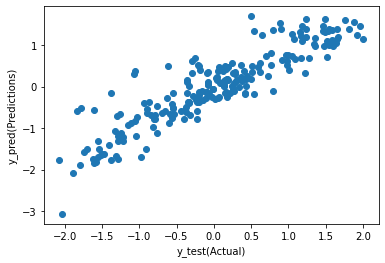

In [174]:
plt.scatter(y_test, y_pred)
plt.xlabel('y_test(Actual)')
plt.ylabel('y_pred(Predictions)')

In [175]:
error = y_test-y_pred

C:\Users\aeagu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

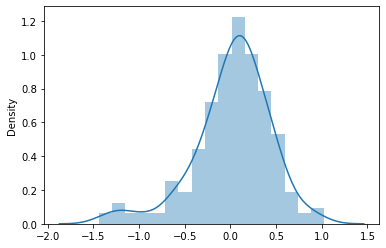

In [176]:
sns.distplot(error)

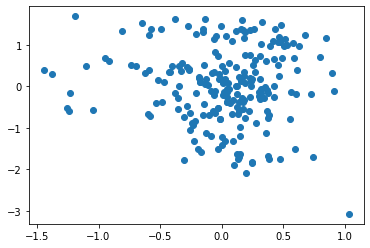

In [178]:
plt.scatter(error,y_pred)

In [ ]:
#error is also normally distributed and peak around 0,residual vs pred is also random